In [4]:
from joblib import load
from anfis import predict  # recuerda que el objeto ANFIS lo necesita
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Cargar modelo entrenado
anfis_model = load("models/anfis_model.pkl")
scaler_X = load("models/scaler_X.pkl")
scaler_y = load("models/scaler_y.pkl")

print("✅ Modelo y escaladores cargados")


✅ Modelo y escaladores cargados


In [5]:
# Cargar CSV de validación
df_test = pd.read_csv("data/datos_reales_validacion.csv")

X_test_real = df_test[['tiempo', 'voltaje', 'catalizador']].values
y_test_real = df_test[['hidrogeno']].values.flatten()

# Escalar entradas
X_test_scaled = scaler_X.transform(X_test_real)


In [6]:
# Predicción con el modelo cargado
y_pred_scaled = predict(anfis_model, X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calcular RMSE y R²
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print("\n=== Validación con modelo guardado ===")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")



=== Validación con modelo guardado ===
RMSE: 4.159
R²: 0.943


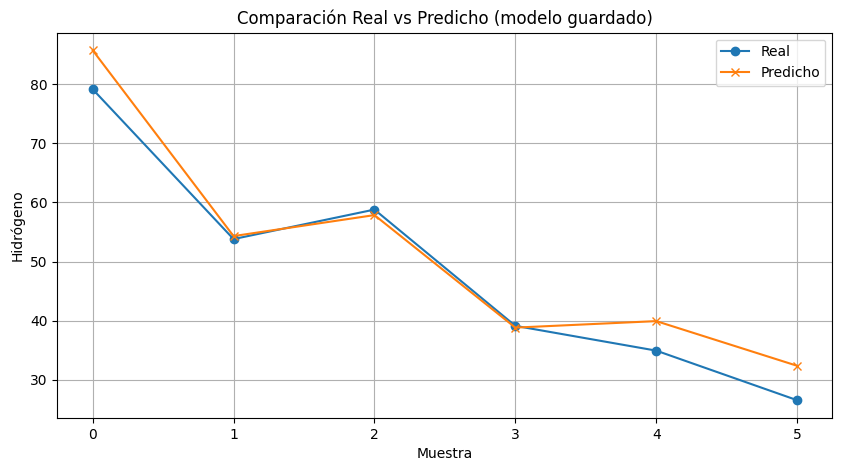

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test_real, label="Real", marker="o")
plt.plot(y_pred, label="Predicho", marker="x")
plt.title("Comparación Real vs Predicho (modelo guardado)")
plt.xlabel("Muestra")
plt.ylabel("Hidrógeno")
plt.grid(True)
plt.legend()
plt.show()
